L'utilizzo di una catena di giunzioni Josepshon permette di diminuire l'anarmonicità del qubit in esame. Questa anarmonicità che, in prima approssimazione,  nel caso di una singola giunzione è pari a $E_c$, nel caso di una catena di N giunzioni diventa $\frac{E_c}{N^2}$. Per dimostrare ciò consideriamo le seguenti situazioni:

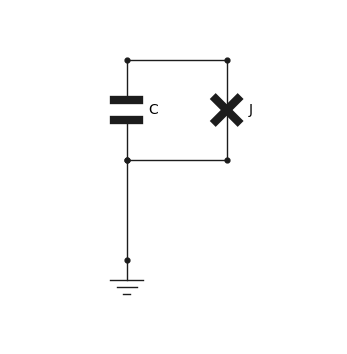

In [3]:
import qucat

circuit=qucat.GUI('netlist.txt')
#circuit.show()

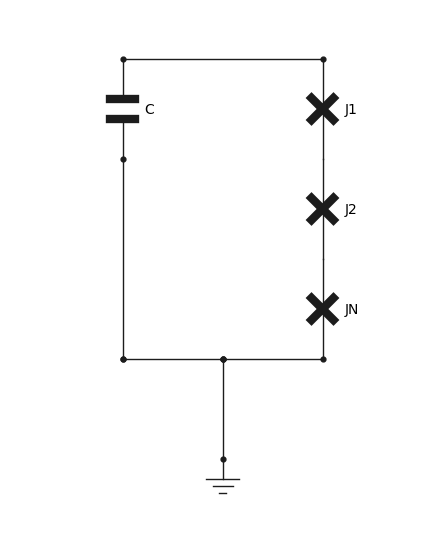

In [4]:
circuit=qucat.GUI('netlist.txt')

Nella prima abbiamo il classico qubit, nella seconda il qubit con la catena di giunzioni. La fase $\phi$ totale della catena di giunzioni è la stessa della singola giunzione nel primo caso. Assumendo che tutte le giunzioni $J_i$ nella catena siano uguali, possiamo dire che  $\phi_i=\frac{\phi}{N}$. Calcoliamo la $E_j$ sia nel caso di una singola giunzione che nel caso di una catena è pari a $$Ej=(\frac{\hbar}{2e})^2\frac{1}{L}$$, dove L è l'induttanza lineare della giunzione. Nel caso della catena $$Ej_i=(\frac{\hbar}{2e})^2\frac{1}{L_i}=(\frac{\hbar}{2e})^2\frac{N}{L}$$, dove $L_i$ è l'induttanza lineare della singola giunzione nella catena.

Come si può osservare $Ej_i=NEj$.

L'energia totale data dalle giunzioni sarà $$V_{TOT}=\sum_i{Ej_icos\phi}=\sum_i{Ej_icos(\phi/N)}=NEj_icos(\phi/N)=N^2Ejcos(\phi/N)$$.

Per calcolare l'anarmonicità consideriamo il quarto ordine dello sviluppo di Taylor ed andiamo in seconda quantizzazione
$$\alpha=\frac{N^2Ej}{4!}(\frac{\phi}{N})^4=\frac{Ej}{4!N^2}\frac{2E_c}{Ej}(a^\dagger+a)^4$$ da cui si nota che $\alpha \propto \frac{E_c}{N^2}$.

Oss. Nella formula è stato utilizzato $E_j$ perchè lo sviluppo al secondo ordine del coseno in entrambi i casi è lo stesso, quindi significa che entrambi vengono diagonalizzati dallo stesso operatore $\phi$ e quindi possiamo prendere in prestito l'equazione dello zero point fluctuation del primo caso



In [10]:
C=50e-15 #define the value of capacitance (F)
L=10e-9 #defin the value of the inductance (H)

#Caso con singola giunzione
circuit_components=[qucat.C(0,1,C),
                    qucat.J(0,1,L)
                   ]
circuit=qucat.Network(circuit_components)
alpha1=circuit.anharmonicities()

#Caso con due giunzioni
circuit_components=[qucat.C(0,1,C),
                    qucat.J(1,2,L/2),
                    qucat.J(2,0,L/2)
                   ]
circuit=qucat.Network(circuit_components)
alpha2=circuit.anharmonicities()

#Caso con tre giunzioni
circuit_components=[qucat.C(0,1,C),
                    qucat.J(1,2,L/3),
                    qucat.J(2,3,L/3),
                    qucat.J(3,0,L/3)
                   ]
circuit=qucat.Network(circuit_components)
alpha3=circuit.anharmonicities()

#Caso con quattro giunzioni
circuit_components=[qucat.C(0,1,C),
                    qucat.J(1,2,L/4),
                    qucat.J(2,3,L/4),
                    qucat.J(3,4,L/4),
                    qucat.J(3,4,L/4),
                    qucat.J(4,0,L/4)
                   ]
circuit=qucat.Network(circuit_components)
alpha4=circuit.anharmonicities()

#Caso con cinque giunzioni
circuit_components=[qucat.C(0,1,C),
                    qucat.J(1,2,L/5),
                    qucat.J(2,3,L/5),
                    qucat.J(3,4,L/5),
                    qucat.J(3,4,L/5),
                    qucat.J(4,5,L/5),
                    qucat.J(5,0,L/5)
                   ]
circuit=qucat.Network(circuit_components)
alpha5=circuit.anharmonicities()

alpha=[alpha1,alpha2,alpha3,alpha4,alpha5]
N=[1,1/4,1/9,1/16,1/25]

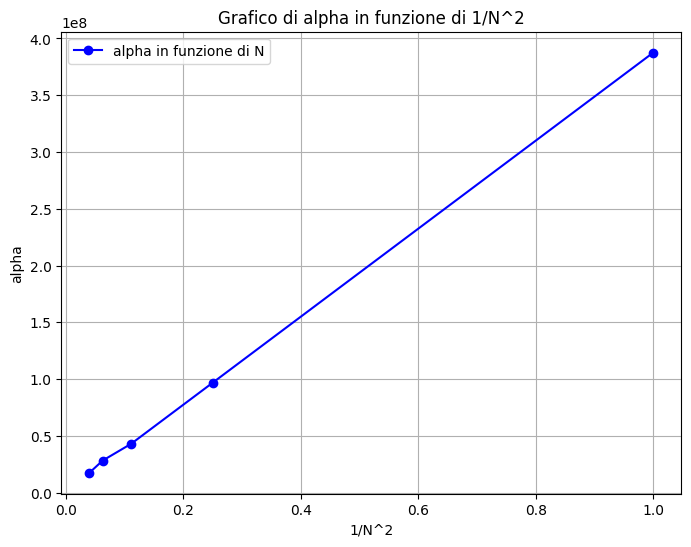

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Creare il grafico
plt.figure(figsize=(8, 6))
plt.plot(N, alpha, marker='o', linestyle='-', color='b', label='alpha in funzione di N')
plt.xlabel('1/N^2')
plt.ylabel('alpha')
plt.title('Grafico di alpha in funzione di 1/N^2')
plt.legend()
plt.grid(True)
plt.show()